## Sprocket Analysis


In [26]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [12]:
# current working library 
cwd = os.getcwd()

df_trans = pd.read_excel(cwd+"/kpmg_data.xlsx",'Transactions', header=1)


In [13]:
df_trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [15]:
df_trans.shape


(20000, 13)

In [16]:
df_trans.info()
# there are some missing values for the columns 'online_order', 'brand', 'product_line', 'product_class','product_size','standard_cost','product_first_sold_date'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [22]:
# Data types
df_trans.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [23]:
#checking for duplicates 

df_trans.duplicated().value_counts()

False    20000
dtype: int64

In [24]:
# product_id
df_trans.product_id.value_counts()
# 101 different products 

0      1378
3       354
1       311
35      268
38      267
       ... 
71      137
8       136
16      136
100     130
47      121
Name: product_id, Length: 101, dtype: int64

In [25]:
# customer_id
df_trans.customer_id.value_counts()
# 3494 customers 

2183    14
2476    14
1068    14
1672    13
2912    13
        ..
898      1
2352     1
1846     1
3279     1
1757     1
Name: customer_id, Length: 3494, dtype: int64

In [27]:
# transaction_date
df_trans.transaction_date.dt.month.value_counts()


10    1771
8     1749
7     1717
5     1685
1     1682
11    1665
3     1656
4     1655
12    1644
2     1623
6     1581
9     1572
Name: transaction_date, dtype: int64

In [28]:
#online_order
df_trans.online_order.value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [29]:
#order_status
df_trans.order_status.value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [31]:
#brand
df_trans.brand.value_counts().sum()

19803

In [33]:
#product_line
df_trans.product_line.value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [35]:
#product_class
df_trans.product_class.value_counts()


medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [36]:
#product_size
df_trans.product_size.value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [37]:
# list_price
df_trans.list_price.mean()

1107.8294490000271

<AxesSubplot:>

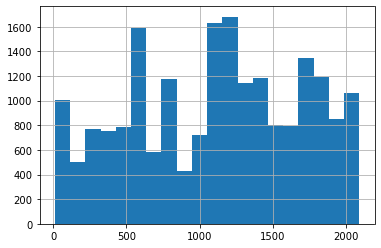

In [41]:
#plot
df_trans.list_price.hist(bins=20)

<AxesSubplot:>

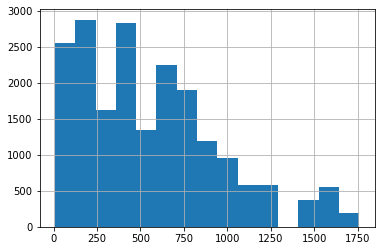

In [43]:
df_trans.standard_cost.hist(bins=15)

In [47]:

cwd = os.getcwd()

df_cust = pd.read_excel(cwd+"/kpmg_data.xlsx",'CustomerDemographic', header=1)

/var/folders/vm/b6ydykh17cj0scwxhn8k2tn40000gn/T/ipykernel_64598/132022738.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df_cust = pd.read_excel(cwd+"/kpmg_data.xlsx",'CustomerDemographic', header=1)


In [49]:
df_cust.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [50]:
df_cust.info()
# missing vlaues in the columns 'last_name','DOB','job_title','job_industry_category','default','tenure'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [51]:
df_cust.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [52]:
df_cust.gender.value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [55]:
df_cust.DOB.dt.year.value_counts().sort_index()

1843.0      1
1931.0      1
1935.0      1
1940.0      1
1943.0      1
1944.0      1
1953.0     19
1954.0     61
1955.0     58
1956.0     63
1957.0     71
1958.0     55
1959.0     94
1960.0     58
1961.0     60
1962.0     76
1963.0     59
1964.0     85
1965.0     69
1966.0     65
1967.0     73
1968.0     69
1969.0     78
1970.0     57
1971.0     88
1972.0     54
1973.0    122
1974.0    152
1975.0    114
1976.0    152
1977.0    204
1978.0    217
1979.0    118
1980.0    123
1981.0     79
1982.0     41
1983.0     40
1984.0     43
1985.0     91
1986.0    114
1987.0     72
1988.0     72
1989.0     74
1990.0     53
1991.0     48
1992.0     74
1993.0     60
1994.0     79
1995.0     90
1996.0     67
1997.0     74
1998.0     80
1999.0     60
2000.0     42
2001.0     34
2002.0      6
Name: DOB, dtype: int64

In [56]:
df_cust.wealth_segment.value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [58]:
cwd = os.getcwd()

df_addrs = pd.read_excel(cwd+"/kpmg_data.xlsx",'CustomerAddress', header=1)

In [59]:
df_addrs.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [81]:
 df_addrs[['state']]



,state
0,New South Wales
1,New South Wales
2,QLD
3,New South Wales
4,VIC
...,...
3994,VIC
3995,QLD
3996,NSW
3997,QLD


In [85]:
df_addrs['state']


0       New South Wales
1       New South Wales
2                   QLD
3       New South Wales
4                   VIC
             ...       
3994                VIC
3995                QLD
3996                NSW
3997                QLD
3998                NSW
Name: state, Length: 3999, dtype: object

In [60]:
df_addrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [61]:
df_addrs.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [64]:
df_addrs.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [65]:
df_addrs.country.value_counts()

Australia    3999
Name: country, dtype: int64

In [66]:
df_addrs.property_valuation.value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64